# Project 4: Clustering 

This project will involve clustering - grouping similar datapoints together - using 2 popular methods K-Means and Agglomerative clustering. 
The goal of this project is to apply clustering techniques to recommend Spotify songs. 

## Inspecting the Data & Data Understanding

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [2]:
data = pd.read_csv('/content/myplaylist.csv')

In [3]:
data.shape

(275, 17)

In [4]:
data.head()

,Unnamed: 0,name,album,artist,genre,release_date,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
0,0,West End Kids,Vikings,New Politics,"['indie poptimism', 'modern alternative rock',...",2015-08-14,212026,48,0.007540,0.604,0.902,0.000000,0.6200,-1.912,0.0386,130.029,3
1,1,Wish I Knew You,Men Amongst Mountains,The Revivalists,"['modern alternative rock', 'modern blues rock...",2015-07-15,274093,68,0.142000,0.649,0.718,0.071300,0.1240,-6.593,0.0261,101.034,4
2,2,Get You (feat. Kali Uchis),Freudian,Daniel Caesar,"['canadian contemporary r&b', 'pop', 'r&b']",2017-08-25,278179,80,0.422000,0.658,0.294,0.000052,0.0749,-8.533,0.0321,74.038,4
3,3,I'm Not Racist,I'm Not Racist,Joyner Lucas,"['boston hip hop', 'hip hop', 'pop rap', 'rap']",2017-12-04,408063,55,0.779000,0.605,0.613,0.000000,0.0981,-10.479,0.8690,63.764,3
4,4,Everything Is Alright,Commit This To Memory,Motion City Soundtrack,"['emo', 'pop punk']",2005-06-07,207581,0,0.000547,0.436,0.945,0.000000,0.3100,-3.824,0.0957,161.074,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        275 non-null    int64  
 1   name              275 non-null    object 
 2   album             275 non-null    object 
 3   artist            275 non-null    object 
 4   genre             275 non-null    object 
 5   release_date      275 non-null    object 
 6   length            275 non-null    int64  
 7   popularity        275 non-null    int64  
 8   acousticness      275 non-null    float64
 9   danceability      275 non-null    float64
 10  energy            275 non-null    float64
 11  instrumentalness  275 non-null    float64
 12  liveness          275 non-null    float64
 13  loudness          275 non-null    float64
 14  speechiness       275 non-null    float64
 15  tempo             275 non-null    float64
 16  time_signature    275 non-null    int64  
dt

In [6]:
data.describe()

,Unnamed: 0,length,popularity,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature
count,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,137.000000,224268.745455,58.676364,0.158302,0.637353,0.696793,0.026450,0.183147,-5.888542,0.086292,118.654204,3.967273
std,79.529869,44213.633958,26.020500,0.210248,0.140721,0.183730,0.119593,0.137639,2.480259,0.093186,24.857176,0.334759
min,0.000000,107076.000000,0.000000,0.000010,0.166000,0.176000,0.000000,0.032600,-18.064000,0.023800,63.764000,1.000000
25%,68.500000,197053.000000,47.000000,0.009205,0.554500,0.574500,0.000000,0.092550,-7.366500,0.038200,99.960500,4.000000
50%,137.000000,218053.000000,68.000000,0.062700,0.652000,0.716000,0.000002,0.127000,-5.476000,0.054100,119.051000,4.000000
75%,205.500000,244920.000000,78.000000,0.209000,0.734000,0.853500,0.000239,0.237000,-4.130000,0.083200,133.072500,4.000000
max,274.000000,425653.000000,91.000000,0.892000,0.965000,0.991000,0.874000,0.699000,-1.077000,0.869000,189.008000,5.000000


These are interesting statistics. Looks like the songs vary a lot in the features.

In [7]:
data = data.drop(['Unnamed: 0'],axis=1)
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

In [8]:
# data['genre'].value_counts().plot(kind='barh', figsize=(10, 6), rot=0, color='green')
# plt.xlabel("Song Count", labelpad=8)
# plt.ylabel("Genre", labelpad=14)

There are a lot of Underground Rap songs and Dark Trap in this dataset. 

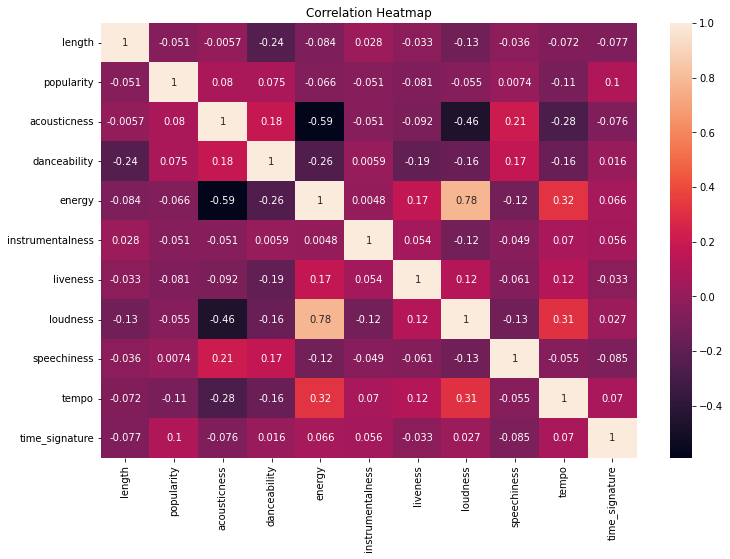

In [9]:
# correlation heatmap between features
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

From the correlation heatmap, there are no 2 features that are strongly correlated to each other, maybe except energy and loudness.

Let's visualize the main features of different genres.

In [10]:
numeric_data = data._get_numeric_data()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efc12e316d0>,
      dtype=object)

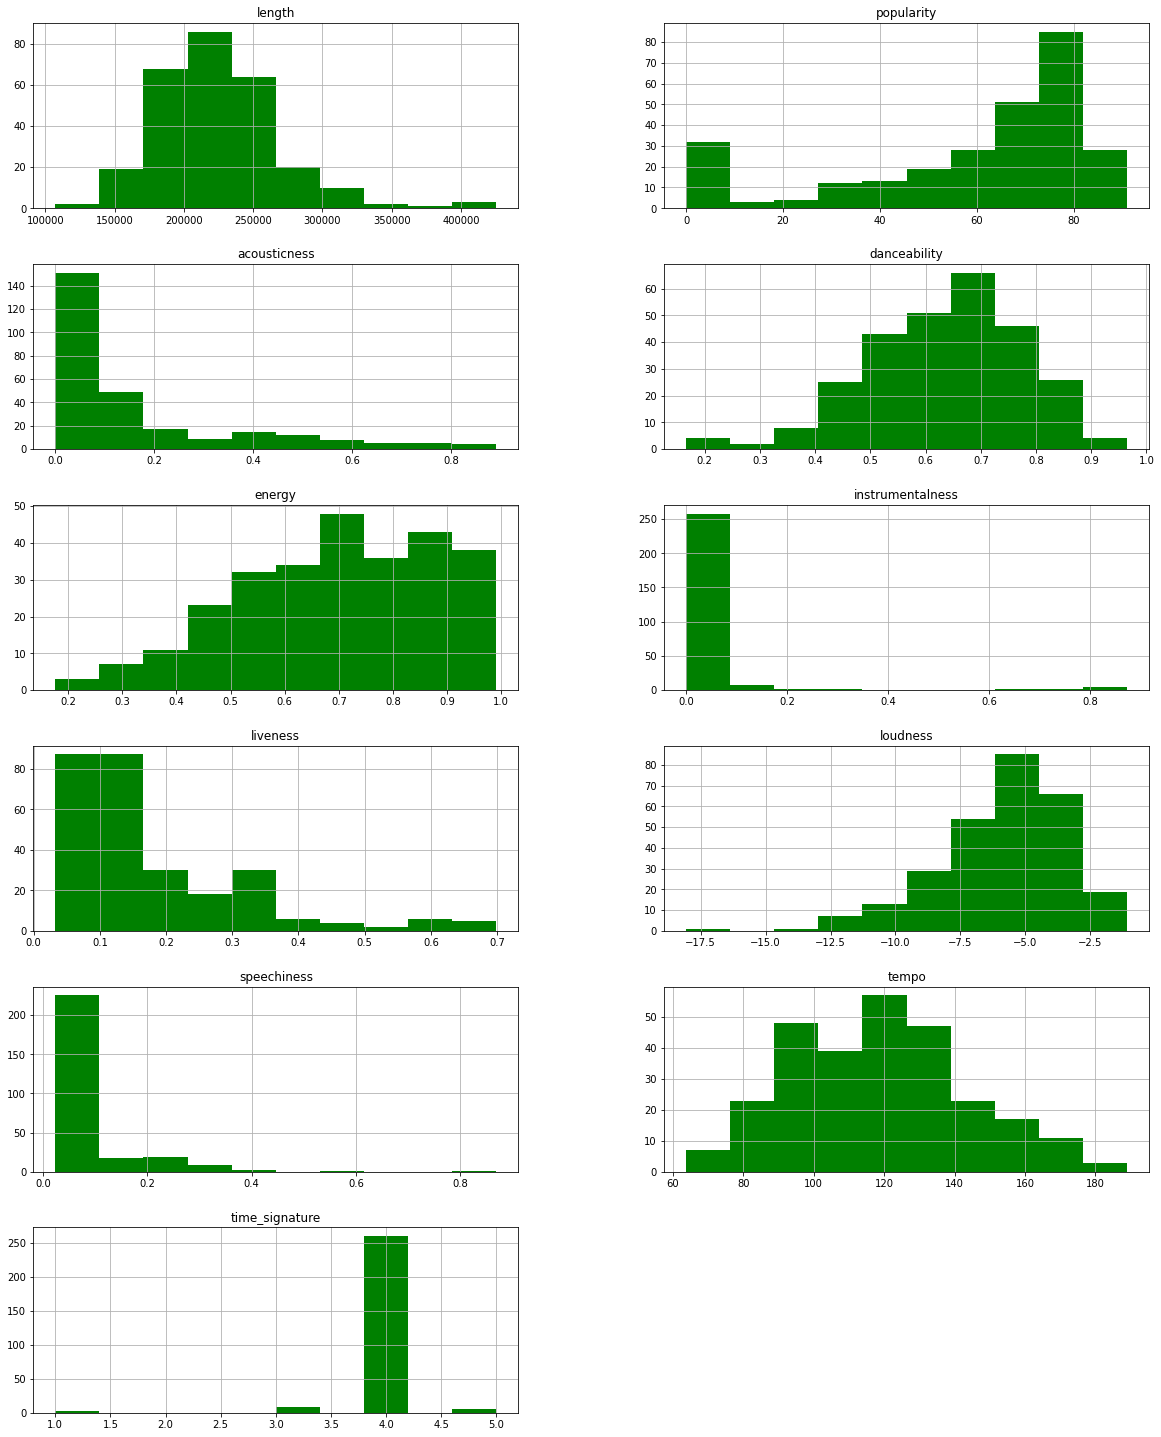

In [11]:
numeric_data.hist(layout=(7,2),figsize=(20, 30),color='green')

## Preprocessing

Since the data is already quite clean, I will just standardize the data using these features: acousticness, danceability, instrumentalness, energy, and speechiness.

In [12]:
cluster_features = ['acousticness', 'danceability', 'instrumentalness', 'energy', 'speechiness']
track_cluster = data[cluster_features]

In [13]:
# standarize the range of the data: This will enable the features to have a an impact on the result.
X = np.array(track_cluster)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Modeling

To find out the optimal k for K-Means clustering, I will use the Elbow method to calculate Within-Cluster-Sum of Squared Errors (WSS) for different values of k.

In [14]:
# calculate inertia for each k value (Sum of squared distances of samples to their closest cluster center)
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=10000, init='k-means++', random_state=123)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

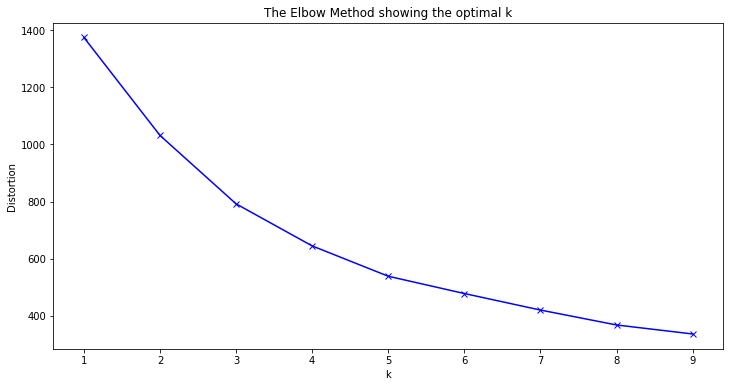

In [15]:
# plot the elbow method results
plt.figure(figsize=(12,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Although it is not very clear, the elbow graph shows that the optimal value for k is 3. Just to make sure, I will also use Silhoutte score to see which is the optimal k.

In [16]:
# calculate the silhoutte score, the higher the score (closer to 1) the better
for n_clusters in range(2,10):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.31276781693794947)
For n_clusters = 3, silhouette score is 0.3435122644487405)
For n_clusters = 4, silhouette score is 0.36502794982623)
For n_clusters = 5, silhouette score is 0.2742626238652869)
For n_clusters = 6, silhouette score is 0.2951918032522727)
For n_clusters = 7, silhouette score is 0.2675717575392566)
For n_clusters = 8, silhouette score is 0.2748984327050079)
For n_clusters = 9, silhouette score is 0.28235953058737917)


From the above calculations, looks like the optimal cluster is 4. SO I will choose k = 4. 

In [17]:
# Use K-means clustering model
kmeans = KMeans(n_clusters=4, max_iter=10000, init='k-means++', random_state=123)
kmeans.fit(X)

KMeans(max_iter=10000, n_clusters=4, random_state=123)

## Clustering Analysis

Since we have quite a few features, I will perform PCA to reduce the number of dimensions to 3 for easier visualization. 

In [18]:
# PCA for the clusters
pca = PCA(n_components=3, random_state=123)
pca_results = pca.fit_transform(X)

In [19]:
df_pca = pd.DataFrame(pca_results)
df_pca.columns = ['PC1', 'PC2','PC3']
df_pca['label'] = kmeans.labels_
df_pca.head()

,PC1,PC2,PC3,label
0,-1.362892,-0.275514,0.091198,1
1,-0.319488,0.530572,-0.260964,1
2,1.973226,0.356481,-1.551687,2
3,4.761234,-2.550681,4.631843,0
4,-1.790494,-0.614946,0.039423,1


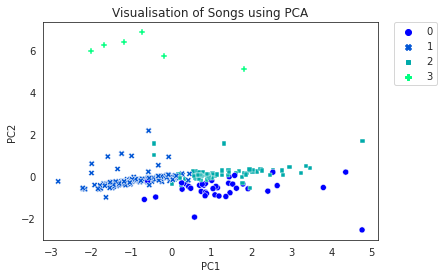

In [20]:
p = ['#DC4E76', '#CC4B93', '#A946BE', '#5C4AE4']
sns.set_style('white')
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='label', style='label', palette='winter')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Visualisation of Songs using PCA')
plt.show()

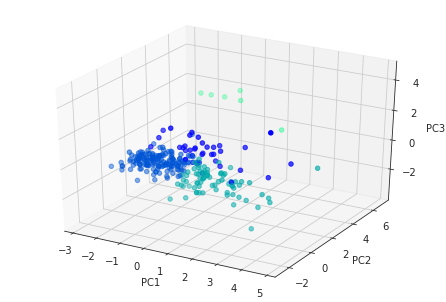

In [21]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'],
           c=df_pca['label'], cmap= 'winter')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

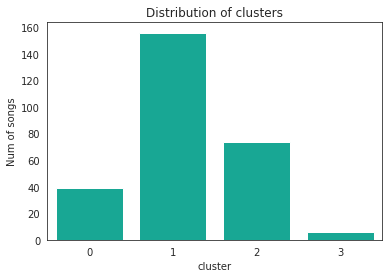

In [22]:
data.loc[:,'cluster'] = kmeans.labels_
artist_cluster_size = data.groupby('cluster').size().reset_index(name='Num of songs')
sns.barplot(data= artist_cluster_size, x='cluster', y='Num of songs', color='#00BFA5')
plt.title('Distribution of clusters')
plt.show()

Cluster 1 has the most songs while cluster 3 has very few songs.

In [23]:
radar_col = cluster_features + ['cluster']

# feature average for each cluster as a radar chart
df_radar = data[radar_col]
df_radar = df_radar.groupby('cluster').mean().reset_index()
df_radar


,cluster,acousticness,danceability,instrumentalness,energy,speechiness
0,0,0.205131,0.726256,0.008734,0.631692,0.270128
1,1,0.045206,0.604814,0.009267,0.807622,0.052321
2,2,0.377762,0.655865,0.010657,0.495716,0.064039
3,3,0.087715,0.677167,0.783167,0.718333,0.049067


From the table above looks like most cluster have similar danceability. Cluster 0 is high in speechiness and acousticness. Cluster 1 is high in energy and danceability.
Cluster 2 is high in acousticness, and danceability.
Final cluster is high in instrumentalness, danceability, and energy.


In [24]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
    
    # Initialise the radar plot
    ax = plt.subplot(2,math.ceil(num_clusters/2),row+1, polar=True, )
    
    # If you want the first axis to be on top:
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

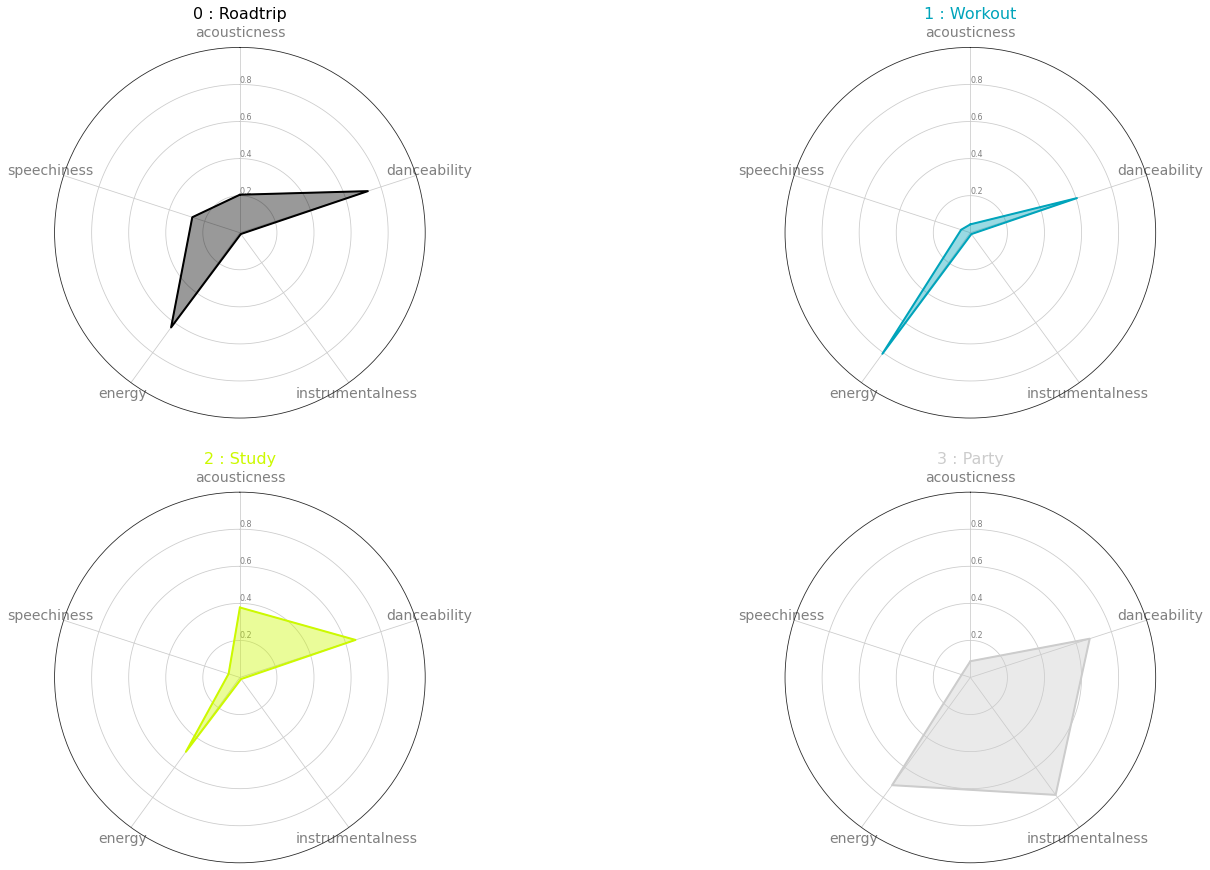

In [25]:
# initialize the figure
p = '#173F5F', '#20639B', '#3CAEA3', '#F6D55C'
plt.figure(figsize=(24,15))
 
# Create a color palette:
my_palette = plt.cm.get_cmap('nipy_spectral', len(df_radar.index))

# Create cluster name
title_list = ['Roadtrip', 'Workout', "Study", 'Party']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row], 
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))

    
# Show plot
plt.show()

## Conclusion

It has been a very interesting process to try extract data using the Spotify API and use clustering to group songs together to create new playlists. I learned a lot during this whole process!